# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

# Zalando dataset

https://www.kaggle.com/zalando-research/fashionmnist/data

**Context**
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."
Zalando seeks to replace the original MNIST dataset

**Content**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. 
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

**Labels**
Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

**TL;DR**
Each row is a separate image 
Column 1 is the class label. 
Remaining columns are pixel numbers (784 total). 
Each value is the darkness of the pixel (1 to 255)

**Acknowledgements**
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist
Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

**License**
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [2]:
def get_label_name(idx):
    if (idx == 0):
        return '(0) T-shirt/top'
    elif (idx == 1):
        return '(1) Trouser'
    elif (idx == 2):
        return '(2) Pullover'
    elif (idx == 3):
        return '(3) Dress'
    elif (idx == 4):
        return '(4) Coat'
    elif (idx == 5):
        return '(5) Sandal'
    elif (idx == 6):
        return '(6) Shirt'
    elif (idx == 7):
        return '(7) Sneaker'
    elif (idx == 8):
        return '(8) Bag'
    elif (idx == 9):
        return '(9) Ankle boot'

In [3]:
def get_random_element_with_label (data, lbls, lbl):
    subset = data[lbls == lbl]
    return np.random.choice(subset)

In [4]:
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_test = pd.read_csv('fashion-mnist_test.csv', header = 0)

In [11]:
%%timeit
data_train_np = np.loadtxt('fashion-mnist_train.csv',delimiter=',',skiprows=1)  

1min 23s ± 4.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
len(data_train)

60000

In [6]:
data_train.shape

(60000, 785)

Let's test our function to get a random element from a subset

# Train dataset preparation

In [7]:
labels = data_train['label'].values.reshape(1, 60000)

labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()


train = data_train.drop('label', axis=1).transpose()

In [8]:
print(labels_.shape)
print(train.shape)

(10, 60000)
(784, 60000)


# Test dataset preparation

In [9]:
labels_test = data_test['label'].values.reshape(1, 10000)

labels_test_ = np.zeros((10000, 10))
labels_test_[np.arange(10000), labels_test] = 1
labels_test_ = labels_test_.transpose()


test = data_test.drop('label', axis=1).transpose()

In [10]:
labels_test_.shape

(10, 10000)

### Normalization of data

Let's normalize the training data dividing by 255.0 to get the values between 0 and 1.

In [11]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

### One example of the images

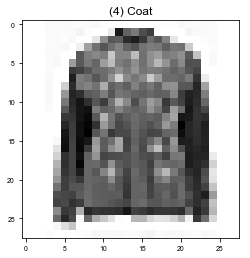

In [263]:
idx = 5
plt.imshow(train[:,idx].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.title(get_label_name(labels[:,idx]))
plt.show()

# Let's check some random sample of the data

THe following function will return one numpy array (one column) with an example of a choosen label.

In [13]:
def get_random_element_with_label (data, lbls, lbl):
    tmp = lbls == lbl
    subset = data[:,tmp.flatten()]
    return subset[:,randint(1,subset.shape[1])]

## Let's create an array with a column for each label

The following code create a numpy array where in column 0 you will find an example of label 0, in column 1 of label 1 and so on.

In [14]:
labels_overview = np.empty([784,10])
for i in range (0,10):
    col = get_random_element_with_label(train, labels, i)
    labels_overview[:,i] = col

Now let's plot one example of each type (label)

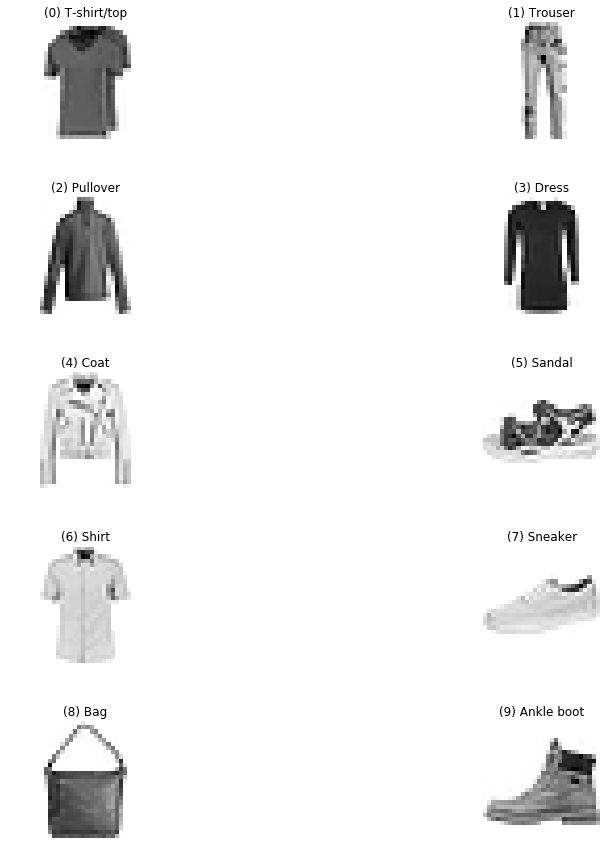

In [15]:
f = plt.figure(figsize=(15,15));
count = 1
for i in range(0,10):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.5)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[:,i].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

# 1 Layers + Softmax + Convergence vs. number of neurons

In [13]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 15 # Number of neurons in layer 1
n2 = 10 # Number of neurons in output layer 

cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
cost_history = []
for epoch in range(training_epochs+1):
    for i in range(0, features.shape[1], 1):
        X_train_mini = features[:,i:i + 1]
        y_train_mini = classes[:,i:i + 1]

        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
    cost_history = np.append(cost_history, cost_)

    if (epoch % logging_step == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

In [84]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 100
    
cost_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer, feed_dict = {X: train, Y: labels_, learning_rate: 0.01})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate: 0.01})
    cost_history = np.append(cost_history, cost_)
    
    if (epoch % 10 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.331401
Reached epoch 10 cost J = 0.330879
Reached epoch 20 cost J = 0.33039
Reached epoch 30 cost J = 0.329932
Reached epoch 40 cost J = 0.3295
Reached epoch 50 cost J = 0.329093
Reached epoch 60 cost J = 0.328712
Reached epoch 70 cost J = 0.328352
Reached epoch 80 cost J = 0.328009
Reached epoch 90 cost J = 0.327688
Reached epoch 100 cost J = 0.327383


In [85]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.160433


In [14]:
def model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

In [147]:
sess, cost_history1 = model (50, 100, train, labels_, 10, 0.01)

Reached epoch 0 cost J = 0.324494
Reached epoch 10 cost J = 0.274697
Reached epoch 20 cost J = 0.256744
Reached epoch 30 cost J = 0.247012
Reached epoch 40 cost J = 0.240899
Reached epoch 50 cost J = 0.236662
Reached epoch 60 cost J = 0.233693
Reached epoch 70 cost J = 0.231264
Reached epoch 80 cost J = 0.229229
Reached epoch 90 cost J = 0.227472
Reached epoch 100 cost J = 0.225911


## Random choice of 10000 elements 

In [67]:
rnd_list = np.random.choice(train.shape[1], 10000)
train_red = train[:, rnd_list]
labels_red = labels_[:, rnd_list]
labels_int = labels[0, rnd_list]

for i in range (10):
    print ('Number of elements in class ',i,'=', np.sum(labels_int == i))

Number of elements in class  0 = 980
Number of elements in class  1 = 1010
Number of elements in class  2 = 999
Number of elements in class  3 = 995
Number of elements in class  4 = 995
Number of elements in class  5 = 971
Number of elements in class  6 = 1019
Number of elements in class  7 = 1011
Number of elements in class  8 = 998
Number of elements in class  9 = 1022


In [80]:
%%time
sess1, cost_history1 = model(minibatch_size = 1, 
                              training_epochs = 100, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = 0.0001)

Reached epoch 0 cost J = 0.31713
Reached epoch 10 cost J = 0.166352
Reached epoch 20 cost J = 0.135573
Reached epoch 30 cost J = 0.121482
Reached epoch 40 cost J = 0.113303
Reached epoch 50 cost J = 0.108148
Reached epoch 60 cost J = 0.104227
Reached epoch 70 cost J = 0.100981
Reached epoch 80 cost J = 0.0983656
Reached epoch 90 cost J = 0.0962468
Reached epoch 100 cost J = 0.0945182
Wall time: 35min 26s


### Let's calculate train and test accuracy for our model

In [86]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess1))

Accuracy: 0.80325


In [73]:
%%time
sessb, cost_history500_2 = model(minibatch_size = 60000, 
                              training_epochs = 1000, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.01)

Reached epoch 0 cost J = 0.324015
Reached epoch 50 cost J = 0.323806
Reached epoch 100 cost J = 0.323599
Reached epoch 150 cost J = 0.323392
Reached epoch 200 cost J = 0.323184
Reached epoch 250 cost J = 0.322972
Reached epoch 300 cost J = 0.322754
Reached epoch 350 cost J = 0.322528
Reached epoch 400 cost J = 0.322297
Reached epoch 450 cost J = 0.322051
Reached epoch 500 cost J = 0.321789
Reached epoch 550 cost J = 0.321509
Reached epoch 600 cost J = 0.32121
Reached epoch 650 cost J = 0.320893
Reached epoch 700 cost J = 0.320552
Reached epoch 750 cost J = 0.320184
Reached epoch 800 cost J = 0.319789
Reached epoch 850 cost J = 0.319362
Reached epoch 900 cost J = 0.318899
Reached epoch 950 cost J = 0.318394
Reached epoch 1000 cost J = 0.31785
Wall time: 19min 29s


(0, 1000)

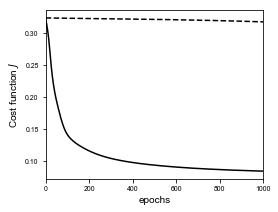

In [76]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(cost_history1, ls='solid', color = 'black')
ax.plot(cost_history50, ls='-', color = 'black')
ax.plot(cost_history500_2, ls='--', color = 'black')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')

plt.xlim((0,1000))

In [139]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sessb))

Accuracy: 0.823883


In [144]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sessb))

Accuracy: 0.7336


### `corr_pred` array containing information on which prediction is right and which is wrong

The `corr_pred` array contains `True` when the prediction is right and `False` when it is not.

In [ ]:
%%time
sessb, cost_history500 = model(minibatch_size = 50, 
                              training_epochs = 1000, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 100,
                              learning_r = 0.001)

In [128]:
corr_pred = sessb.run(correct_predictions, feed_dict = {X: train, Y: labels_, learning_rate: 0.1})

In [129]:
corr_pred[0:40] 

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True], dtype=bool)

### The `pred` array contains the actual predictions.

In [131]:
pred = sessb.run(tf.argmax(y_,0), feed_dict = {X: train, Y: labels_, learning_rate: 0.1})

# Let's check some wrong predictions

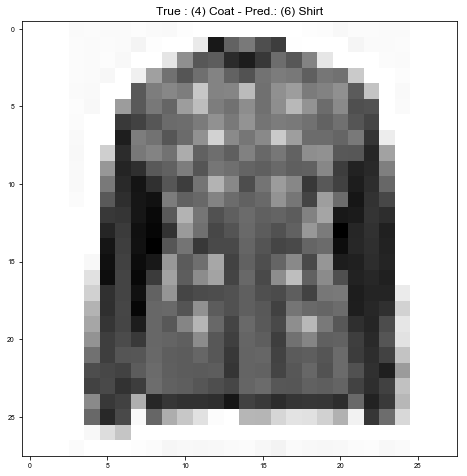

In [132]:
f = plt.figure(figsize=(8,8));
plt.imshow(train[:,5].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.title('True : '+get_label_name(labels[:,5])+' - Pred.: '+str(get_label_name(pred[5])))
plt.axis("on")
plt.show()

### Let's check 10 examples of wrongly classified images

Let's first get 10 random examples of wrongly classified images

In [137]:
lim = 70
wrongly_classified_images = train[:,0:lim]
wrongly_classified_images = wrongly_classified_images[:, corr_pred[0:lim] == False]
wrong_labels = labels[:,0:lim]
wrong_labels = wrong_labels[:, corr_pred[0:lim] == False]
wrong_pred = pred.reshape(1,60000)[:,0:lim]
wrong_pred = wrong_pred[:,corr_pred[0:lim] == False]

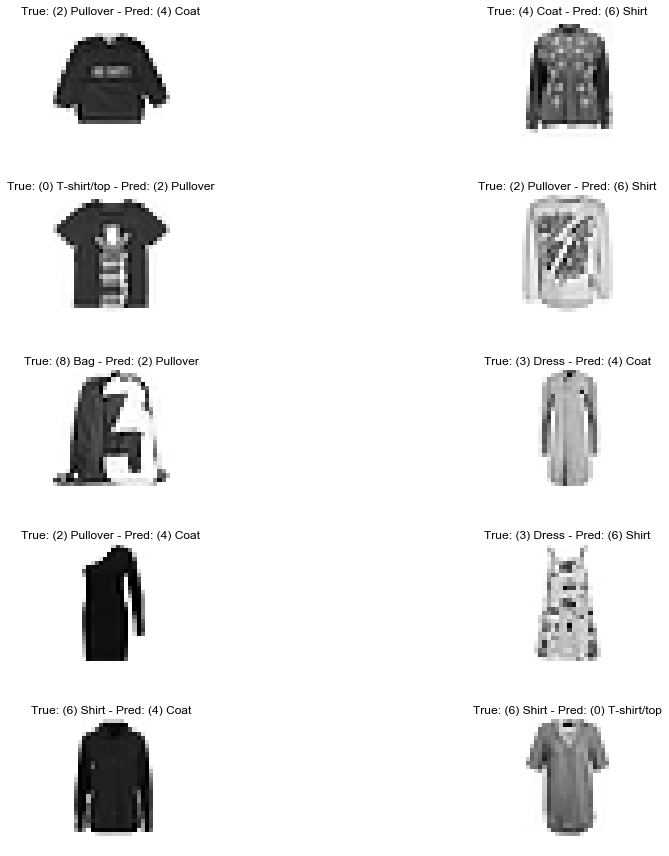

In [138]:
f = plt.figure(figsize=(15,15));
count = 1
for i in range(0,10):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.5)
    plt.title('True: ' + get_label_name(wrong_labels[:,i]) + ' - Pred: ' + get_label_name(wrong_pred[:,i]))
    some_digit_image = wrongly_classified_images[:,i].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

# 15 neurons

In [25]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 15 # Number of neurons in layer 1
n2 = 10 # Number of neurons in output layer 

cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [26]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
cost_history = []
for epoch in range(1000+1):
    for i in range(0, train.shape[1], 50):
        X_train_mini = train[:,i:i + 50]
        y_train_mini = labels_[:,i:i + 50]

        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: 0.001})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate: 0.001})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 10 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.326015
Reached epoch 10 cost J = 0.294436
Reached epoch 20 cost J = 0.23573
Reached epoch 30 cost J = 0.191477
Reached epoch 40 cost J = 0.164247
Reached epoch 50 cost J = 0.148597
Reached epoch 60 cost J = 0.139156
Reached epoch 70 cost J = 0.132707
Reached epoch 80 cost J = 0.12781
Reached epoch 90 cost J = 0.123746
Reached epoch 100 cost J = 0.12017
Reached epoch 110 cost J = 0.116929
Reached epoch 120 cost J = 0.11396
Reached epoch 130 cost J = 0.111257
Reached epoch 140 cost J = 0.108819
Reached epoch 150 cost J = 0.106639
Reached epoch 160 cost J = 0.104698
Reached epoch 170 cost J = 0.102969
Reached epoch 180 cost J = 0.101419
Reached epoch 190 cost J = 0.100024
Reached epoch 200 cost J = 0.0987597
Reached epoch 210 cost J = 0.097603
Reached epoch 220 cost J = 0.0965397
Reached epoch 230 cost J = 0.0955553
Reached epoch 240 cost J = 0.0946399
Reached epoch 250 cost J = 0.093784
Reached epoch 260 cost J = 0.0929818
Reached epoch 270 cost J = 0.0922262
R

In [27]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.853267


In [28]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.8519


# 50 neurons

In [35]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 50 # Number of neurons in layer 1
n2 = 10 # Number of neurons in output layer 

cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [36]:
%%time
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
cost_history = []
for epoch in range(1000+1):
    for i in range(0, train.shape[1], 50):
        X_train_mini = train[:,i:i + 50]
        y_train_mini = labels_[:,i:i + 50]

        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: 0.001})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate: 0.001})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 10 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.329011
Reached epoch 10 cost J = 0.220687
Reached epoch 20 cost J = 0.169212
Reached epoch 30 cost J = 0.147768
Reached epoch 40 cost J = 0.135878
Reached epoch 50 cost J = 0.127698
Reached epoch 60 cost J = 0.121352
Reached epoch 70 cost J = 0.116142
Reached epoch 80 cost J = 0.111847
Reached epoch 90 cost J = 0.108285
Reached epoch 100 cost J = 0.105278
Reached epoch 110 cost J = 0.102711
Reached epoch 120 cost J = 0.100495
Reached epoch 130 cost J = 0.0985634
Reached epoch 140 cost J = 0.096861
Reached epoch 150 cost J = 0.0953485
Reached epoch 160 cost J = 0.0939932
Reached epoch 170 cost J = 0.0927675
Reached epoch 180 cost J = 0.091653
Reached epoch 190 cost J = 0.090633
Reached epoch 200 cost J = 0.0896948
Reached epoch 210 cost J = 0.0888281
Reached epoch 220 cost J = 0.0880239
Reached epoch 230 cost J = 0.0872742
Reached epoch 240 cost J = 0.0865726
Reached epoch 250 cost J = 0.0859143
Reached epoch 260 cost J = 0.0852939
Reached epoch 270 cost J = 0

In [37]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.864583


In [38]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.8609


In [39]:
sess.close()

In [106]:
sess.close()

# 3 layers, 10 neurons

In [140]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 10 # Number of neurons in layer 1
n2 = 10 # Number of neurons in layer 2 
n3 = 10
n4 = 10
#n5 = 10 # Neurons for the softmax function

cost_history = np.empty(shape=[0], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

stddev_f = 0.1

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=2.0 / np.sqrt(n_dim+n2))) 
b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=2.0 / np.sqrt(n1+n3))) 
b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
W3 = tf.Variable(tf.truncated_normal([n3,n2], stddev = 2.0 / np.sqrt(n2+n4)))
b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
W4 = tf.Variable(tf.truncated_normal([n4,n3], stddev = 2.0 / np.sqrt(n3+1)))
b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
Z4 = tf.matmul(W4, Z3) + b4
y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [143]:
%%time
sess = tf.Session()
sess.run(tf.global_variables_initializer())

learning_r = 0.01
minibatch_size = 50
    
cost_historyL3 = []
for epoch in range(100+1):
    #print (epoch, ' ', learning_r)
    for i in range(0, train.shape[1], minibatch_size):
        X_train_mini = train[:,i:i + minibatch_size]
        y_train_mini = labels_[:,i:i + minibatch_size]

        #sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_})
    cost_historyL3 = np.append(cost_historyL3, cost_)
    
    if (epoch % 5 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.302226
Reached epoch 5 cost J = 0.137558
Reached epoch 10 cost J = 0.108331
Reached epoch 15 cost J = 0.100399
Reached epoch 20 cost J = 0.0955192
Reached epoch 25 cost J = 0.0916443
Reached epoch 30 cost J = 0.0883506
Reached epoch 35 cost J = 0.0856237
Reached epoch 40 cost J = 0.0833771
Reached epoch 45 cost J = 0.0814716
Reached epoch 50 cost J = 0.0799088
Reached epoch 55 cost J = 0.0792906
Reached epoch 60 cost J = 0.0791393
Reached epoch 65 cost J = 0.0789921
Reached epoch 70 cost J = 0.0788486
Reached epoch 75 cost J = 0.0787086
Reached epoch 80 cost J = 0.0785708
Reached epoch 85 cost J = 0.0784354
Reached epoch 90 cost J = 0.0783033
Reached epoch 95 cost J = 0.078173
Reached epoch 100 cost J = 0.0780451
Wall time: 2min 59s


# 1 Layer with decaying learning rate

In [127]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 100 # Number of neurons in layer 1
n2 = 10 # Neurons for the softmax function

cost_history = np.empty(shape=[1], dtype = float)

stddev_f = 0.1

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=stddev_f)) 
b1 = tf.Variable(tf.constant(stddev_f, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2,n1], stddev = stddev_f))
b2 = tf.Variable(tf.constant(stddev_f, shape = [n2,1]))
                 
# Let's build our network...
Z1 = tf.nn.sigmoid(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.matmul(W2,Z1) + b2
y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)


global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.05
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                       1e5, 0.9, staircase=True)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

learning_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost, global_step=global_step)

init = tf.global_variables_initializer()

In [ ]:
%%time
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#learning_r = 1e-5
minibatch_size = 20
    
cost_history = []
for epoch in range(200+1):
    rnd_list = np.random.choice(train.shape[1], 60000)
    train_red = train[:, rnd_list]
    labels_red = labels_[:, rnd_list]
    for i in range(0, train.shape[1], minibatch_size):
        X_train_mini = train_red[:,i:i + minibatch_size]
        y_train_mini = labels_red[:,i:i + minibatch_size]

        #sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        sess.run(learning_step, feed_dict = {X: X_train_mini, Y: y_train_mini})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_})
    cost_history = np.append(cost_history, cost_)
    #if (epoch % 30 == 0):
    #    learning_r = learning_r / 2.0

    if (epoch % 10 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)
        print(sess.run(global_step, feed_dict = { X:train, Y: labels_} ))

In [124]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.1


In [125]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.1


Text(0,0.5,'Cost function $J$')

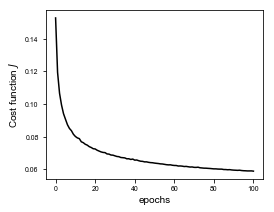

In [118]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(cost_history1, ls='solid', color = 'black')
ax.plot(cost_history, ls='-', color = 'black')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')

In [ ]:
sess.close()

# Function to create a layer

In [12]:
def create_layer (X, n, activation):
    ndim = int(X.shape[0])
    stddev = 2.0 / np.sqrt(ndim)
    initialization = tf.truncated_normal((n, ndim), stddev = stddev)
    W = tf.Variable(initialization)
    b = tf.Variable(tf.zeros([n,1]))
    Z = tf.matmul(W,X)+b
    return activation(Z)

In [13]:
tf.reset_default_graph()

n_dim = 784
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 10

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
outputs = create_layer (hidden4, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))


# Adam
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

# Gradient Descent (GD)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
def model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

## Plain GD

Re-build the network with the GD optimizer instead of the Adam.

In [15]:
sess, cost_history = model (50, 100, train, labels_, logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 1.00874
Reached epoch 10 cost J = 0.93706
Reached epoch 20 cost J = 0.927668
Reached epoch 30 cost J = 0.923309
Reached epoch 40 cost J = 0.920409
Reached epoch 50 cost J = 0.918113
Reached epoch 60 cost J = 0.916245
Reached epoch 70 cost J = 0.914733
Reached epoch 80 cost J = 0.913462
Reached epoch 90 cost J = 0.912368
Reached epoch 100 cost J = 0.911416


In [16]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.868317


In [17]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.8606


## Adam

Re-build the network with the Adam optimizer.

In [19]:
sess, cost_history_adam = model (50, 100, train, labels_, logging_step = 10, learning_r = 0.1)

Reached epoch 0 cost J = 0.938146
Reached epoch 10 cost J = 0.912077
Reached epoch 20 cost J = 0.907471
Reached epoch 30 cost J = 0.904924
Reached epoch 40 cost J = 0.903253
Reached epoch 50 cost J = 0.902341
Reached epoch 60 cost J = 0.901571
Reached epoch 70 cost J = 0.901046
Reached epoch 80 cost J = 0.900121
Reached epoch 90 cost J = 0.899242
Reached epoch 100 cost J = 0.898657


In [20]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.900417


In [21]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.872


## Comparison GD and Adam Convergence

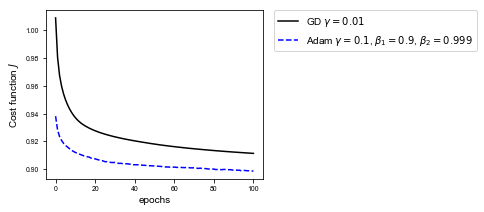

In [25]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(cost_history1, ls='solid', color = 'black')
ax.plot(cost_history, ls='-', color = 'black', label = r'GD $\gamma=0.01$')
ax.plot(cost_history_adam, ls='--', color = 'blue', label = r'Adam $\gamma = 0.1$, $\beta_1=0.9$, $\beta_2=0.999$')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_4-28'+'.png', format='png', dpi=300,bbox_inches='tight')

#plt.figure(figsize=(8,6))
#plt.title("Cost Function vs. epoch number")
#plt.xlabel("epochs")
#plt.xlim((0,1000))
#plt.ylabel("Cost function $J$")
#plt.plot(range(len(cost_history)), cost_history)